In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plt_unix_time_to_CST(ax):
    plt.locator_params(axis='x', nbins=5)
    xticks = ax.get_xticks()
    ax.set_xticklabels([pd.to_datetime(tm, unit='s').tz_localize('UTC').tz_convert('US/Central').strftime('%Y-%m-%d\n %H:%M:%S %Z')
                          for tm in xticks], rotation=30)

def plt_set_labels(ax, x_label, y_label, title):
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

In [2]:
purcell_df = pd.read_csv('purcell_may22_25degveto.csv', index_col=0, header=0)
bloch_df = pd.read_csv('Bloch_May22.txt', index_col=0, header=None, names=purcell_df.columns, delimiter=' ')
bloch_df = bloch_df.drop(axis=0, labels=1524640055)

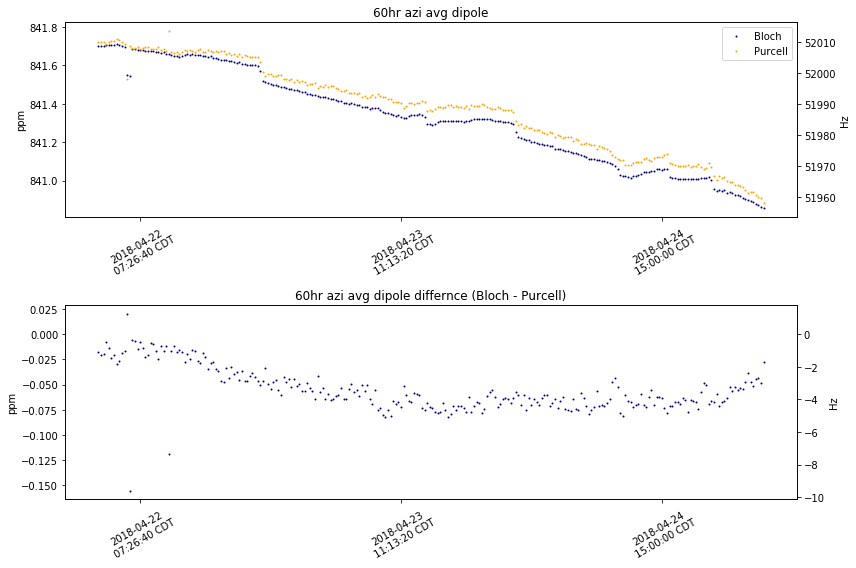

In [3]:
fig, ax = plt.subplots(2,1)
plt.sca(ax[0])
plt.plot(bloch_df.index.values, bloch_df['m1'], '.',markersize=2, color='navy',label='Bloch')
plt.plot(purcell_df.index.values, purcell_df['m1'], '.',markersize=2, color='orange', label='Purcell')
ax[0].legend()
ax0a = ax[0].twinx()
mn, mx = ax[0].get_ylim()
ax0a.set_ylim(mn*61.79, mx*61.79)
ax0a.set_ylabel('Hz')
plt_set_labels(ax[0],'','ppm','60hr azi avg dipole')
plt_unix_time_to_CST(ax[0])

plt.sca(ax[1])
plt.plot(bloch_df.index.values, bloch_df['m1']-purcell_df['m1'], '.',markersize=2, color='navy')
ax1a = ax[1].twinx()
mn, mx = ax[1].get_ylim()
ax1a.set_ylim(mn*61.79, mx*61.79)
ax1a.set_ylabel('Hz')
plt_set_labels(ax[1],'','ppm','60hr azi avg dipole differnce (Bloch - Purcell)')
plt_unix_time_to_CST(ax[1])

fig.set_size_inches(12,8)
fig.tight_layout()

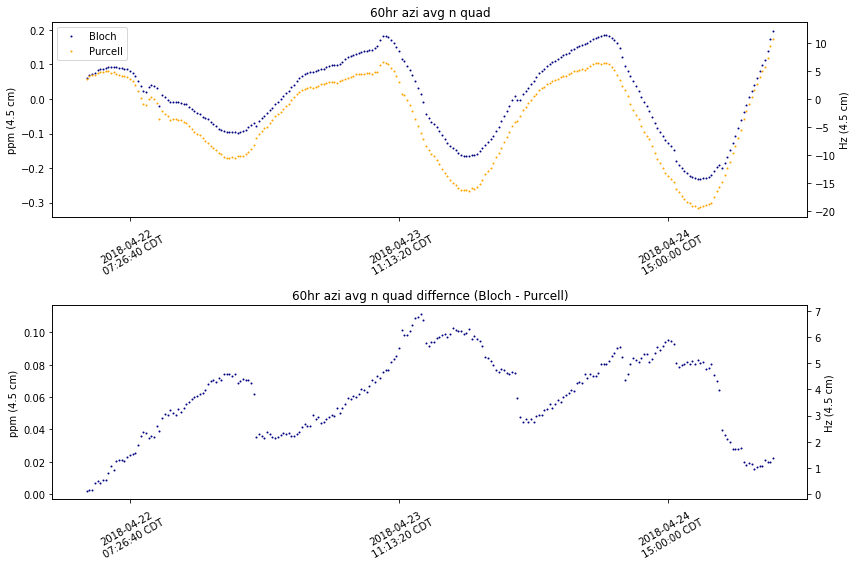

In [5]:
fig, ax = plt.subplots(2,1)
plt.sca(ax[0])
plt.plot(bloch_df.index.values, bloch_df['m2'], '.',markersize=2, color='navy',label='Bloch')
plt.plot(purcell_df.index.values, purcell_df['m2'], '.',markersize=2, color='orange', label='Purcell')
ax[0].legend()
ax0a = ax[0].twinx()
mn, mx = ax[0].get_ylim()
ax0a.set_ylim(mn*61.79, mx*61.79)
ax0a.set_ylabel('Hz (4.5 cm)')
plt_set_labels(ax[0],'','ppm (4.5 cm)','60hr azi avg n quad')
plt_unix_time_to_CST(ax[0])

plt.sca(ax[1])
plt.plot(bloch_df.index.values, bloch_df['m2']-purcell_df['m2'], '.',markersize=2, color='navy')
ax1a = ax[1].twinx()
mn, mx = ax[1].get_ylim()
ax1a.set_ylim(mn*61.79, mx*61.79)
ax1a.set_ylabel('Hz (4.5 cm)')
plt_set_labels(ax[1],'','ppm (4.5 cm)','60hr azi avg n quad differnce (Bloch - Purcell)')
plt_unix_time_to_CST(ax[1])

fig.set_size_inches(12,8)
fig.tight_layout()